In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
import pickle

In [8]:
train = pd.read_csv('train.csv')
train.shape

(614, 13)

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#missing value treatment to categorical features
train['Gender'] = train['Gender'].replace(np.nan,train['Gender'].mode()[0])
train['Married'] = train['Married'].replace(np.nan,train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].replace(np.nan,train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].replace(np.nan,train['Self_Employed'].mode()[0])
train['Credit_History'] = train['Credit_History'].replace(np.nan,train['Credit_History'].mode()[0])

In [11]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [12]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


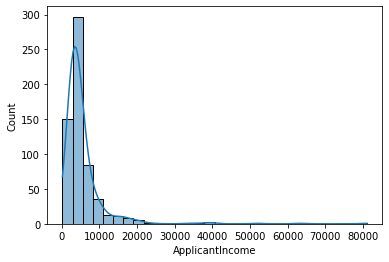

In [13]:
sns.histplot(train['ApplicantIncome'],bins=30,kde=True)

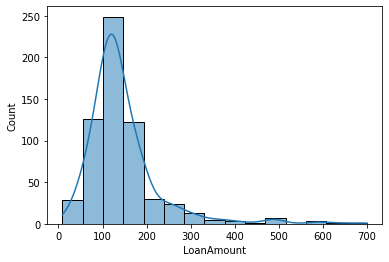

In [14]:
sns.histplot(train['LoanAmount'],bins=15,kde=True)

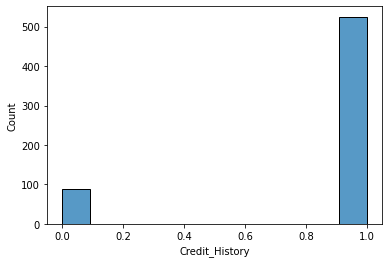

In [15]:
sns.histplot(train['Credit_History'])

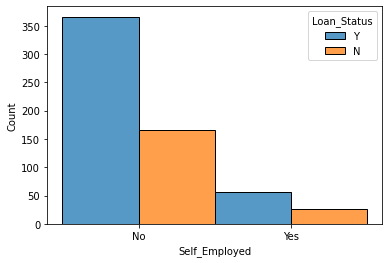

In [16]:
sns.histplot(data=train,x='Self_Employed',hue='Loan_Status',multiple='dodge')

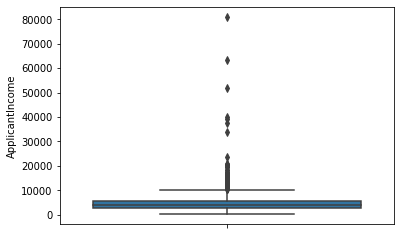

In [17]:
sns.boxplot(data=train,y='ApplicantIncome')

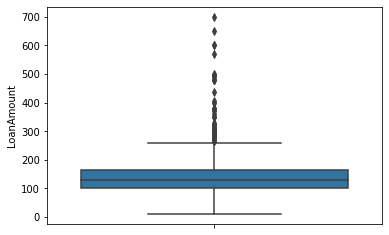

In [18]:
sns.boxplot(data=train,y='LoanAmount')

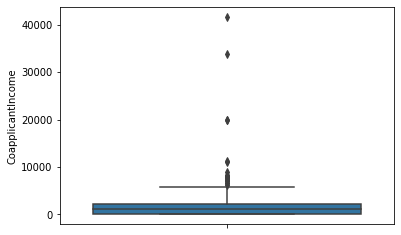

In [19]:
sns.boxplot(data=train,y='CoapplicantIncome')

In [20]:
#we can remove the outlier by just appying scaling

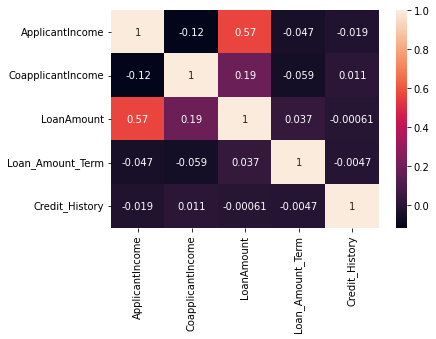

In [21]:
#lets check the corelation between the data
sns.heatmap(train.corr(),annot=True)

In [22]:
train.to_csv('dataset.csv')

In [23]:
#Dropping unwanted column
train.drop('Loan_ID',axis=1,inplace=True)

In [24]:
#onehot encoding
X_train = pd.get_dummies(train.drop('Loan_Status',axis=1),drop_first=True)
real_Xtrain = X_train

In [25]:
scaler = StandardScaler()
scaler_model = scaler.fit(X_train)
x_scaler = scaler_model.transform(X_train)

In [26]:
train['Loan_Status'] = train['Loan_Status'].replace({'Y':1,'N':0})

In [27]:
y = train['Loan_Status']

#Train Test split


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.33, random_state=42)

#Random Forest

In [29]:
rf = RandomForestClassifier()
rfmodel = rf.fit(X_train,y_train)
y_predict = rfmodel.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[ 35,  37],
       [  8, 123]])

In [30]:
accuracy = metrics.accuracy_score(y_test,y_predict)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 77.833%


In [31]:
param = {
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [5,10,20,15,30,35,40,45,50,25],
    'n_estimators': [10,25,30,35,40,45,50,15]
}

In [32]:
gscv = GridSearchCV(rf,param,cv=6,n_jobs=-1,scoring='accuracy')
gscv.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 15, 30, 35, 40, 45, 50,
                                              25],
                         'n_estimators': [10, 25, 30, 35, 40, 45, 50, 15]},
             scoring='accuracy')

In [33]:
gscv.best_params_

{'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 15}

In [34]:
gscv.best_score_

0.815004262574595

In [35]:
rf_best = gscv.best_estimator_

In [36]:
new_rf = RandomForestClassifier(max_depth=3,min_samples_leaf=10,n_estimators=15)
new_rfmodel = new_rf.fit(X_train,y_train)
rf_y_predict = new_rfmodel.predict(X_test)
confusion_matrix(y_test,rf_y_predict)

array([[ 26,  46],
       [  1, 130]])

In [37]:
accuracy = metrics.accuracy_score(y_test,rf_y_predict)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 76.847%


[Text(0.5, 0.875, 'ApplicantIncome <= -0.294\ngini = 0.438\nsamples = 272\nvalue = [133, 278]'),
 Text(0.3, 0.625, 'Property_Area_Semiurban <= 0.248\ngini = 0.483\nsamples = 124\nvalue = [75, 109]'),
 Text(0.2, 0.375, 'Education_Not Graduate <= 0.682\ngini = 0.499\nsamples = 81\nvalue = [60, 66]'),
 Text(0.1, 0.125, 'gini = 0.483\nsamples = 57\nvalue = [35, 51]'),
 Text(0.3, 0.125, 'gini = 0.469\nsamples = 24\nvalue = [25, 15]'),
 Text(0.4, 0.375, 'gini = 0.383\nsamples = 43\nvalue = [15, 43]'),
 Text(0.7, 0.625, 'Credit_History <= -1.009\ngini = 0.38\nsamples = 148\nvalue = [58, 169]'),
 Text(0.6, 0.375, 'gini = 0.269\nsamples = 14\nvalue = [21, 4]'),
 Text(0.8, 0.375, 'Dependents_1 <= 0.897\ngini = 0.299\nsamples = 134\nvalue = [37, 165]'),
 Text(0.7, 0.125, 'gini = 0.276\nsamples = 109\nvalue = [28, 141]'),
 Text(0.9, 0.125, 'gini = 0.397\nsamples = 25\nvalue = [9, 24]')]

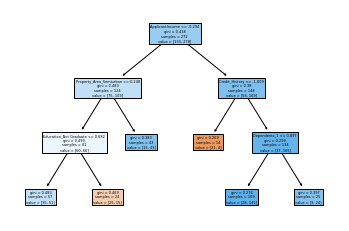

In [38]:
plot_tree(rf_best.estimators_[5], feature_names = real_Xtrain.columns,filled=True)

              precision    recall  f1-score   support

     class 0       0.96      0.36      0.53        72
     class 1       0.74      0.99      0.85       131

    accuracy                           0.77       203
   macro avg       0.85      0.68      0.69       203
weighted avg       0.82      0.77      0.73       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6767387616624259

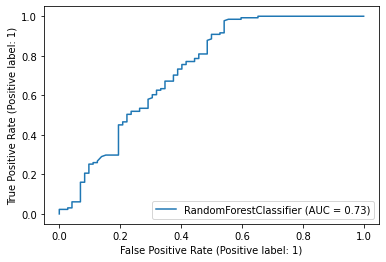

In [39]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, rf_y_predict, target_names=target_names))
metrics.plot_roc_curve(new_rf, X_test, y_test)
metrics.roc_auc_score(y_test, rf_y_predict, average=None) 

#Decision Tree

In [40]:
dt = DecisionTreeClassifier()
dtmodel = dt.fit(X_train,y_train)
y_predict = dtmodel.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[ 38,  34],
       [ 30, 101]])

In [41]:
accuracy = metrics.accuracy_score(y_test,y_predict)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 68.473%


In [42]:
param = {
    'criterion': ['gini','entropy'],
    'min_samples_leaf': [5,10,20,15,30,35,40,45,50,25],
    'splitter': ['best','random'],
    'max_depth':[2,3,4,5,6]
}

In [43]:
gscv = GridSearchCV(dt,param,cv=6,n_jobs=-1,scoring='accuracy')
gscv.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 15, 30, 35, 40, 45, 50,
                                              25],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [44]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, splitter='random')

In [45]:
gscv.best_score_

0.8174197215117931

In [46]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 15,
 'splitter': 'random'}

In [47]:
new_dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15,criterion='gini',splitter='random')
new_dtmodel = new_dt.fit(X_train,y_train)
dt_y_predict = new_dtmodel.predict(X_test)
confusion_matrix(y_test,dt_y_predict)

array([[ 33,  39],
       [  2, 129]])

In [48]:
accuracy = metrics.accuracy_score(y_test,dt_y_predict)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 79.803%


              precision    recall  f1-score   support

     class 0       0.94      0.46      0.62        72
     class 1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7215330788804071

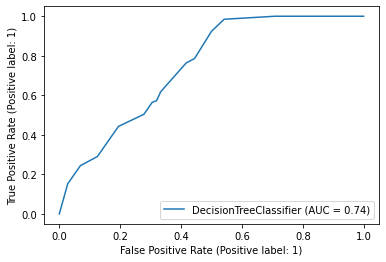

In [49]:

print(classification_report(y_test, dt_y_predict, target_names=target_names))
metrics.plot_roc_curve(new_dt, X_test, y_test)
metrics.roc_auc_score(y_test, dt_y_predict, average=None) 

#Logistic Regression

In [50]:
lr = LogisticRegression()
lrmodel = lr.fit(X_train,y_train)
lr_y_predict = lrmodel.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[ 38,  34],
       [ 30, 101]])

In [51]:
accuracy = metrics.accuracy_score(y_test,y_predict)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 68.473%


              precision    recall  f1-score   support

     class 0       0.94      0.46      0.62        72
     class 1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7215330788804071

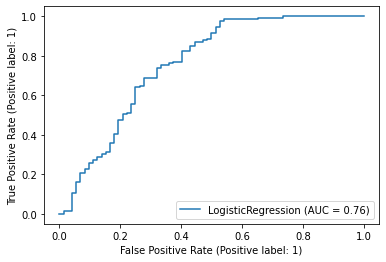

In [52]:
print(classification_report(y_test, lr_y_predict, target_names=target_names))
metrics.plot_roc_curve(lr, X_test, y_test)
metrics.roc_auc_score(y_test, lr_y_predict, average=None) 

#Knn

              precision    recall  f1-score   support

     class 0       0.78      0.44      0.57        72
     class 1       0.75      0.93      0.83       131

    accuracy                           0.76       203
   macro avg       0.77      0.69      0.70       203
weighted avg       0.76      0.76      0.74       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6878710771840543

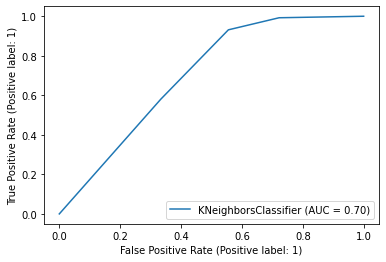

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knnmodel = knn.fit(X_train,y_train)
knn_y_predict = knnmodel.predict(X_test)
metrics.accuracy_score(y_test,knn_y_predict)

print(classification_report(y_test, knn_y_predict, target_names=target_names))
metrics.plot_roc_curve(knnmodel, X_test, y_test)
metrics.roc_auc_score(y_test, knn_y_predict, average=None) 

#XGboost

              precision    recall  f1-score   support

     class 0       0.88      0.49      0.62        72
     class 1       0.77      0.96      0.86       131

    accuracy                           0.79       203
   macro avg       0.82      0.72      0.74       203
weighted avg       0.81      0.79      0.77       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7239715860899067

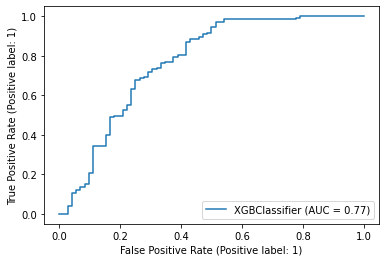

In [54]:
Xgboostmodel = XGBClassifier(objective="binary:logistic", random_state=42)
Xgboostmodel.fit(X_train,y_train)
xgb_y_pred = Xgboostmodel.predict(X_test)
metrics.accuracy_score(y_test,xgb_y_pred)

print(classification_report(y_test, xgb_y_pred, target_names=target_names))
metrics.plot_roc_curve(Xgboostmodel, X_test, y_test)
metrics.roc_auc_score(y_test, xgb_y_pred, average=None) 

#Support Vector Machine


In [55]:
svmmodel = SVC()
svmmodel.fit(X_train,y_train)
svm_y_pred = svmmodel.predict(X_test)
metrics.accuracy_score(y_test,svm_y_pred)

0.7931034482758621

              precision    recall  f1-score   support

     class 0       0.94      0.44      0.60        72
     class 1       0.76      0.98      0.86       131

    accuracy                           0.79       203
   macro avg       0.85      0.71      0.73       203
weighted avg       0.83      0.79      0.77       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7145886344359627

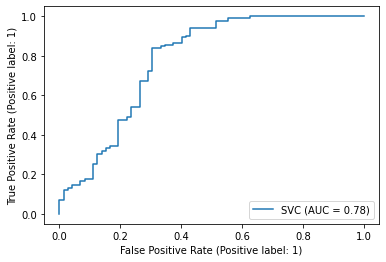

In [56]:
print(classification_report(y_test, svm_y_pred, target_names=target_names))
metrics.plot_roc_curve(svmmodel, X_test, y_test)
metrics.roc_auc_score(y_test, svm_y_pred, average=None) 

#save pickle file

In [57]:
file = open('svm.pkl','wb')
pickle.dump(svmmodel,file)
file.close()

In [58]:
file = open('scale.pkl','wb')
pickle.dump(scaler_model,file)
file.close()